In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import Planck15 as cosmo
import pickle
import astropy.units as u

In [4]:
#Chung2020
data_C20 = np.array([[0.026099239,4.0129008E8],
[0.045196526,2.61727408E8],
[0.07215142,1.7666432E8],
[0.10196226,1.5931592E8],
[0.13927455,1.25403904E8],
[0.19156054,1.23143216E8],
[0.22388355,1.09253768E8],
[0.33629954,9.8502856E7],
[3.7353904,8.2355864E7]])

k_C20 = data_C20[:,0]
Pk_C20 = data_C20[:,1]

In [5]:
#Yue & Ferrara

data_Y19 = np.loadtxt('Yue2020/fig14.txt', skiprows = 1)

k_Y19 = data_Y19[:,0]
Pk_Y19 = data_Y19[:,1]

data_Y19_ang = np.loadtxt('Yue2020/fig13.txt', skiprows = 1)

k_Y19_ang =  data_Y19_ang[:,0] * (np.pi / 180 / 60)
Pk_Y19_ang = data_Y19_ang[:,1]

In [6]:
#Load the Yang et al. model (based on Popping et al.)

data_Y21 = np.loadtxt('Yang2021_PCIIxCIIz6.txt')

k_Y21 = data_Y21[:,0]
Pk_Y21 = data_Y21[:,1]

In [7]:
#compare the 3D power spectra!

PK3D_SIDES_L18 = pickle.load(open('Pk_3D_z6_Lagache.p', 'rb')) #(MJy/sr)**2 / Mpc**3
PK3D_SIDES_DL14 = pickle.load(open('Pk_3D_z6_de_Looze.p', 'rb'))

In [8]:
z=6 #match with the physical cube center z

#values to convert angular into #D
delta_nu = 1 #GHz
nu0 = 1900.5
nu_obs = nu0 / (1+z)
delta_z = (1+z) * delta_nu / nu_obs

delta_Dc = cosmo.comoving_distance(z+delta_z/2) - cosmo.comoving_distance(z-delta_z/2)

Dc = cosmo.comoving_distance(z)

delta_Dc_test = (delta_z * (3.e5*u.km/u.s) / (70. * u.km / u.s / u.Mpc * np.sqrt(0.3*(1+z)**3 + 0.7))).to('Mpc')
print(Dc, delta_Dc, delta_Dc_test)

8435.15779612333 Mpc 11.039291701008551 Mpc 10.856042705688665 Mpc


In [9]:
z_min = nu0 / (nu_obs + delta_nu/2) -1
z_max = nu0 / (nu_obs - delta_nu/2) -1
delta_Dc_check = cosmo.comoving_distance(z_max) - cosmo.comoving_distance(z_min)
print(z_min, z_max, delta_Dc_check)

5.987132352941177 6.012915129151292 11.039273310339922 Mpc


In [10]:
#size of the field at z=6
r_field = np.pi/180. * (Dc / (1+z))
print('Physical size = ', r_field)
print('Comoving size =', r_field * (1+z))

Physical size =  21.031610923945816 Mpc
Comoving size = 147.22127646762073 Mpc


In [16]:
#Comoving volume
((r_field * (1+z))**2 * delta_Dc)**(1/3)

<Quantity 62.08129806 Mpc>

In [12]:
147.22127646762073 / 21.031610923945816

7.000000000000001

In [13]:
Pk_dict = pickle.load(open('Pk_results.p', 'rb'))

Pk_L18 = Pk_dict['Pk_arr_CII_Lagache']
Pk_DL14 = Pk_dict['Pk_arr_CII_de_Looze']
kmean = Pk_dict['kmean']

chan_id = int(nu_obs - 125) # cubes start at 125

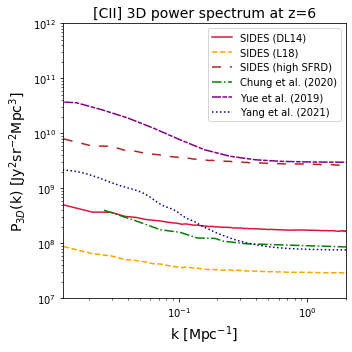

In [14]:
plt.figure(figsize = (5,5))

plt.plot(PK3D_SIDES_DL14['kmean'], PK3D_SIDES_DL14['Pk'],
         label = 'SIDES (DL14)', color = 'crimson')

#conv_y = Dc.value**2*delta_Dc.value
#conv_x = (180./np.pi * 60.) / Dc.value
#plt.plot(conv_x * kmean, conv_y * np.mean(Pk_DL14[chan_id-5:chan_id+5,:], axis = 0), label = 'SIDES (DL14, from angular)', 
         #color = 'red', linestyle = (0,(3,1,1,1,1,1,1,1)))

plt.plot(PK3D_SIDES_L18['kmean'], PK3D_SIDES_L18['Pk'],
         label = 'SIDES (L18)', color = 'orange', linestyle = '--')

pcorr = np.poly1d([ 1.32063242e-02, -3.44720436e-01,  3.21803207e+00, -1.31490389e+01, 19.788931271994528])
corr = (10.**(-pcorr(6)))**2

plt.plot(PK3D_SIDES_DL14['kmean'], corr * PK3D_SIDES_DL14['Pk'], label = 'SIDES (high SFRD)',
color = 'firebrick', linestyle = (0, (6, 6)))

#plt.plot(k_S16, Pk_S16, label = 'Serra et al. (mean forecast)', color = 'royalblue', linestyle = ':')
#plt.plot(k_high_S16, Pk_high_S16, label = 'Serra et al. (high SFRD)', color = 'navy', linestyle = ':')
#plt.plot(k_low_S16, Pk_low_S16, label = 'Serra et al. (low SFRD)', color = 'dodgerblue', linestyle = ':')

plt.plot(k_C20, Pk_C20, label = 'Chung et al. (2020)', color = 'green', linestyle = '-.')
plt.plot(k_Y19, Pk_Y19, label = 'Yue et al. (2019)', color = 'purple', linestyle = (0, (6,1,3,1)))
plt.plot(k_Y21, Pk_Y21, label = 'Yang et al. (2021)', color = 'navy', linestyle = ':')


#plt.legend(loc = 3)

plt.xlim([1.25e-2,2.])
plt.ylim([1.e7,1.e12])

plt.xlabel(r'k [Mpc$^{-1}$]', size = 14)
plt.ylabel(r'P$_{3D}$(k) [Jy$^2$sr$^{-2}$Mpc$^{3}$]', size = 14)
plt.xscale('log')
plt.yscale('log')

plt.legend()

plt.title('[CII] 3D power spectrum at z=6', size = 14)


plt.tight_layout()
plt.savefig('Pk3d_models_comparison.pdf', dpi = 150)

Text(0.5, 0, 'k [arcmin$^{-1}$]')

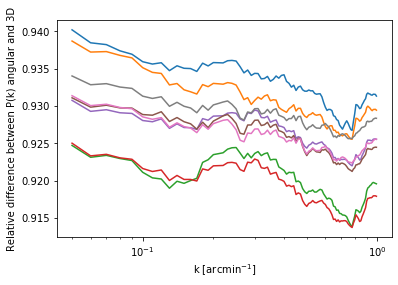

In [15]:
k_interp = np.arange(0.05,1.,0.01)

conv_y = Dc.value**2*delta_Dc.value
conv_x = (180./np.pi * 60.) / Dc.value

for delta_slice in range(2,10): #compute for a various number of averaged slices. N=6 have the best overlap.
    PK3D_interp = np.interp(k_interp, PK3D_SIDES_DL14['kmean'].value, corr * PK3D_SIDES_DL14['Pk'].value)
    PK2Dconv_interp = np.interp(k_interp, conv_x * kmean.value, conv_y * np.mean(Pk_DL14[chan_id-delta_slice:chan_id+delta_slice,:].value, axis = 0))
    plt.plot(k_interp, (PK3D_interp-PK2Dconv_interp)/PK3D_interp)

plt.xscale('log')

plt.ylabel('Relative difference between P(k) angular and 3D')

plt.xlabel(r'k [arcmin$^{-1}$]')

